# Numpy

(adapted from CHEM 1000 - Spring 2023 by Prof. Geoffrey Hutchison, University of Pittsburgh)


Many applications of Python to science, statistics, engineering, etc. are built on top of the [`numpy`](https://numpy.org/devdocs/user/quickstart.html) module. 

**Learning Objectives**

- Understand how to create `numpy` arrays from lists, or regular sets of numbers
- Apply mathematical operations and functions to `numpy` arrays (e.g. for plotting, analysis, vectors, etc.)

**Attribution**

Some of this material has been adapted from [Mathematical Python by Patrick Wills](https://github.com/patrickwalls/mathematical-python/blob/master/scipy/numpy.ipynb)

Before we start, we're going to `import numpy` with a standard shorthand `np`

This means that we refer to functions as `np.sin` and not `numpy.sin`, etc. to save some keystrokes...

In [1]:
import numpy as np

## NumPy Arrays

The fundamental type provided by the NumPy package is the `ndarray`, which is an *n*-dimensional array - usually of numbers.

Generally, that means we can store:
- 1-dimensional lists / vectors
- 2-dimensional matrices / grids
- 3-dimensional 'cube' or volumes of data
- etc. (e.g., cubes of data over time.. maybe an MRI movie or watching a protein move?)

That flexibility adds complexity, unfortunately, but in this class, we'll mostly work with 1D and 2D arrays, which is not too bad. It just means that the Numpy documentation can be complicated to read because functions have to work on so many *types* of `ndarray`.

### Creating Arrays

The function `numpy.array()` creates a NumPy array from a Python list, or a list of lists. 

For example, maybe we have a list of heights in inches from last week:

In [2]:
heights = [ 5*12 + 1, 5*12+7, 6*12+2, 5*12+10, 6*12, 5*12+3, 5*12+6 ] # I made these up
a = np.array(heights)

print(heights)
print(a)

[61, 67, 74, 70, 72, 63, 66]
[61 67 74 70 72 63 66]


Notice that as a list, Python automatically prints commas between the items. When we print with `numpy` there's just space between them, no commas.

We can use the built-in function `type` to verify the variables are different...

In [3]:
type(heights)

list

In [4]:
type(a)

numpy.ndarray

We'll spend most of our time now concentrating on 1D arrays, but it's possible to convert lists of lists to 2D arrays (e.g., a matrix):

In [5]:
M = np.array([[1,2,3],
              [4,5,6]])
print(M)

[[1 2 3]
 [4 5 6]]


Sometimes we want to save ourselves some typing, so there are a few methods to help us create standard kinds of `ndarray`:

There are several NumPy functions for [creating arrays](https://docs.scipy.org/doc/numpy/user/quickstart.html#array-creation) - here we're using the standard `np` abbreviation for `numpy`:

| Function | Description |
| ---: | :--- |
| `np.array(a)` | Create $n$-dimensional NumPy array from sequence `a` |
| `np.linspace(a,b,N)` | Create 1D NumPy array with `N` equally spaced values from `a` to `b` (inclusively)|
| `np.arange(a,b,step)` | Create 1D NumPy array with values from `a` to `b` (exclusively) incremented by `step`|
| `np.zeros(N)` | Create 1D NumPy array of zeros of length $N$ |
| `np.zeros((n,m))` | Create 2D NumPy array of zeros with $n$ rows and $m$ columns |
| `np.full(N, value)` | Create 1D NumPy array of `value` of length $N$ |
| `np.fill((n,m), value)` | Create 2D NumPy array of `value` with $n$ rows and $m$ columns |
| `np.eye(N)` | Create 2D NumPy array with $N$ rows and $N$ columns with ones on the diagonal (ie. the identity matrix of size $N$) |

Create a 1D NumPy array with 11 equally spaced values from 0 to 1:

In [6]:
x = np.linspace(0, 1, 11) # notice that linspace always includes 0, and 1
print(x)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Create a 1D NumPy array with values from 0 to 20 (exclusively) incremented by 2.5:

In [7]:
y = np.arange(0, 20, 2.5) # notice that arange does /not/ include 20
print(y)

[ 0.   2.5  5.   7.5 10.  12.5 15.  17.5]


These are the functions that we'll use most often when creating NumPy arrays. (We've used them for graphing.)

- `numpy.linspace` works best when we know the *number of points* we want in the array.
- `numpy.arange` works best when we know *step size* between values in the array.

A few examples of the other methods:

In [8]:
# Create a 1D NumPy array of zeros of length 5:
z = np.zeros(5)
print(z)

[0. 0. 0. 0. 0.]


In [9]:
# Create a 2D NumPy array of zeros with 2 rows and 5 columns:
M = np.zeros((2,5))
print(M)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [10]:
# create a 1D array with 7 items, all with 0.5
w = np.full(7, 0.5)
print(w)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5]


In [11]:
# Create a 2D NumPy array with 3 rows and 2 columns, filled with pi
N = np.full((3,2), np.pi) # Mmm pies.. 🥧
print(N)

[[3.14159265 3.14159265]
 [3.14159265 3.14159265]
 [3.14159265 3.14159265]]


In [12]:
# full will let values be lists
# this will create a 3x3 array with 1, 2, 3 across each row
one_two_three = np.full((3, 3), [1, 2, 3])
print(one_two_three)

[[1 2 3]
 [1 2 3]
 [1 2 3]]


In [13]:
# Create the identity matrix of size 4:
I = np.eye(4) # we'll use this again when we get to matrices.. esp. bigger ones
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


### Dimension, Shape and Size

We can think of a 1D NumPy array as a list of numbers, a 2D NumPy array as a matrix, a 3D NumPy array as a cube of numbers, and so on. Given a NumPy array, we can find out how many dimensions it has by accessing its `.ndim` attribute. The result is a number telling us how many dimensions it has.

For example - let's check that `I` matrix above:

In [14]:
I.ndim

2

The result tells us that `I` has 2 dimensions. The first dimension corresponds to the vertical direction counting the rows and the second dimension corresponds to the horizontal direction counting the columns.

We can find out how many rows and columns `M` has by accessing its `.shape` attribute:

In [15]:
M.shape

(2, 5)

Of course, we created M to be a $2\times 5$ matrix, so this may seem pretty silly.. still, for example when multiplying vectors and matrices, we need to know what size they are.

We can also use the `.size` attribute to give us the total elements - much like we'd use `len()` on a list.

In [16]:
M.size

10

## Operations and Functions

Of course the point is presumably to help us do math on `ndarray`s, and we can do that.

### Array Operations

[Arithmetic operators](https://docs.scipy.org/doc/numpy/user/quickstart.html#basic-operations) including addition `+`, subtraction `-`, multiplication `*`, division `/` and exponentiation `**` are applied to arrays *elementwise*. For addition and substraction, these are the familiar vector operations we see in linear algebra:

In [17]:
v = np.array([1,2,3])
w = np.array([1,0,-1])

In [18]:
v + w

array([2, 2, 2])

In [19]:
v - w

array([0, 2, 4])

This also works for multiplying or dividing by scalar numbers:

In [20]:
2*v

array([2, 4, 6])

In [21]:
w / 2

array([ 0.5,  0. , -0.5])

The exponent operator ** also acts element by element in the array:

In [22]:
v ** 2

array([1, 4, 9])

### Exercise 1 - Convert some heights in an array

Up above, we defined a list `heights` in inches (ugh) and we want to convert them to meters.

1. Create an `ndarray` of the heights with `np.array()`
2. Convert the whole array to meters - remember that one inch is *exactly* defined as 2.54 cm.
3. Assign that converted array to the variable `heights_in_meters`
4. (Optional) print the new array

### Array Functions

There are *many* [array functions](https://docs.scipy.org/doc/numpy/reference/routines.html) we can use to compute with NumPy arrays. The following is a partial list and we'll look closer at mathematical functions in the next section. Again, we're using the common shortcut of `np` for `numpy`

| | | |
| :---: | :---: | :---: |
| `np.sum` | `np.prod` | `np.mean` |
| `np.max` | `np.min` | `np.std` |

In [24]:
nd_heights = np.array(heights)
heights_in_meters = nd_heights / (100/2.54)

np.sum(heights_in_meters) # probably way too many sig figs

12.014199999999997

In [25]:
round(  np.mean(heights_in_meters), 3) # round the result to 3 decimals

1.716

If you remember, the attribute `.size` at the end of a `ndarray` variable gives us the size:

In [26]:
m = np.sum(heights_in_meters) / heights_in_meters.size
print(m)

1.7163142857142852


Incidentally, tracking the number of significant figures is a bit tedious here. The original heights were in inches, so presumably 2 or 3 sig. figs. Then we convert to meters - with an exact conversion - so the heights in meters have 2-3 significant figures. We add them, so we'd keep the same number of decimals (presumably 2 - for centimeters).. that looks like 4 total singificant figures from `np.sum` and then divide by the `size` .. so presumably, we want 1 number and 3 decimals.

### Mathematical Functions

[Mathematical functions](http://docs.scipy.org/doc/numpy/reference/routines.math.html) in NumPy are called [universal functions](https://docs.scipy.org/doc/numpy/user/quickstart.html#universal-functions) and are *vectorized*. Vectorized functions operate *elementwise* on arrays producing arrays as output and are built to compute values across arrays *very* quickly. The following is a partial list of mathematical functions:

| | | |
| :---: | :---: | :---: |
| `numpy.sin` | `numpy.cos` | `numpy.tan` |
| `numpy.exp` | `numpy.log` | `numpy.log10` |
| `numpy.arcsin` | `numpy.arccos` | `numpy.arctan` |

Compute the values $\sin(2 \pi x)$ for $x = 0,0.25,0.5 \dots, 2.0$:

In [27]:
# I could write out the list
l = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]

# but I'm lazy...
x = np.arange(0, 2.1, 0.25) # note that since np.arange goes up to, but doesn't include the end value...
print(x)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


In [28]:
np.sin(2*np.pi*x)

array([ 0.0000000e+00,  1.0000000e+00,  1.2246468e-16, -1.0000000e+00,
       -2.4492936e-16,  1.0000000e+00,  3.6739404e-16, -1.0000000e+00,
       -4.8985872e-16])

We might expect the array `[0. 1. 0. -1. 0. …]` however there is (as always with floating point numbers on a computer) some rounding errors in the result. In numerical computing, we can interpret a number close to $\approx 10^{-16}$ as $0$.

In any case, that's what we have been when plotting functions:
- Create an array of x values with the resolution we want - usually with `np.arange()` or `np.linspace()`
- Create an array of our function by typing out a formula
- Call `matplotlib` to plot

In [29]:
# Compute the values $\log_{10}(x)$ for $x = 1,10,100,1000,10000$:
x = np.array([1,10,100,1000,10000])
print(x)

[    1    10   100  1000 10000]


In [30]:
np.log10(x)

array([0., 1., 2., 3., 4.])

## Meshgrids

Many times, it's useful to apply functions on a 2D grid. We could, of course create some huge 2D array with np.zeros() or something.

But what we generally want is something like `np.arange()` or `np.linspace()` do in 1D - create a set of points with equal spacing.

For this, we can use `np.meshgrid(x, y)` which takes two arrays (in x and y) and produces two 2D arrays with the X and Y coordinates for all the points in the mesh.

It's probably easier to just demonstrate:

In [31]:
x = np.arange(-5, 5, 0.1) # -5 to 5 with 0.1 grid spacing - remember, it won't include 5.0
y = np.arange(-3, 3, 0.1) # -3 to 3 with 0.1 grid spacing - again, won't include 3.0

xx, yy = np.meshgrid(x, y) # xx will now include the x-values for all the points, etc.

print(xx) # notice xx goes from -5 to 4.9

[[-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 ...
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]]


In [32]:
print(yy) # notice yy goes from -3 to 2.9

[[-3.  -3.  -3.  ... -3.  -3.  -3. ]
 [-2.9 -2.9 -2.9 ... -2.9 -2.9 -2.9]
 [-2.8 -2.8 -2.8 ... -2.8 -2.8 -2.8]
 ...
 [ 2.7  2.7  2.7 ...  2.7  2.7  2.7]
 [ 2.8  2.8  2.8 ...  2.8  2.8  2.8]
 [ 2.9  2.9  2.9 ...  2.9  2.9  2.9]]


The key thing with the meshgrid is that both xx and yy are exactly the same size 2D arrays:

In [33]:
print(xx.shape, yy.shape)

(60, 100) (60, 100)


In [34]:
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2) # evaluate the z = f(x,y)
print(z)

[[ 0.01556126  0.03028564  0.018238   ... -0.0102987   0.018238
   0.03028564]
 [ 0.02728967  0.02602298  0.00108321 ... -0.02600417  0.00108321
   0.02602298]
 [ 0.03012349  0.01320471 -0.0165362  ... -0.03329104 -0.0165362
   0.01320471]
 ...
 [ 0.02375191 -0.00369543 -0.02917031 ... -0.0304208  -0.02917031
  -0.00369543]
 [ 0.03012349  0.01320471 -0.0165362  ... -0.03329104 -0.0165362
   0.01320471]
 [ 0.02728967  0.02602298  0.00108321 ... -0.02600417  0.00108321
   0.02602298]]


We can plot that!

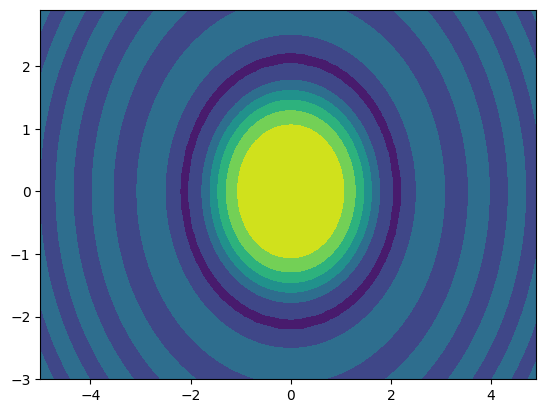

In [35]:
import matplotlib.pyplot as plt
h = plt.contourf(x,y,z) # this creates a contour plot of z = f(x,y)
plt.show()

-------
This notebook is adapted from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

Portions have been adapted from [Mathematical Python by Patrick Wills](https://github.com/patrickwalls/mathematical-python/tree/master/scipy)

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>